### Resource estimation for adders

Text(0.5, 1.0, 'Active volume for different adders')

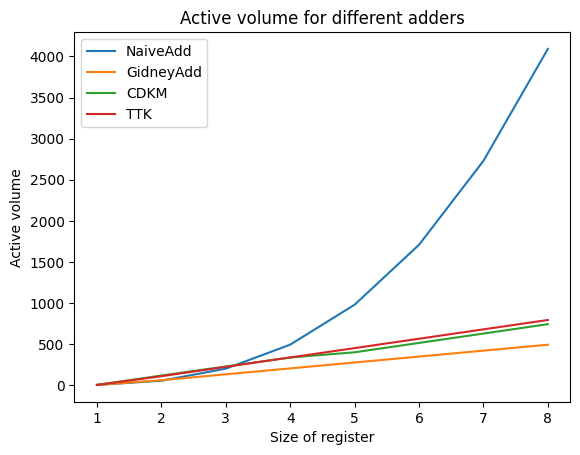

In [1]:
import sys
sys.path.append("/home/coder/projects/qmath")

import random

from matplotlib import pyplot as plt    

from psiqworkbench import QPU, QUInt
import psiqworkbench.qubricks as qbk

from qmath.add import CDKMAdder, TTKAdder


def resource_estimate_adder(adder, num_bits):
    qc = QPU()
    qc.reset(max(10,3*num_bits-1))

    a = QUInt(num_bits, 'a', qc)
    b = QUInt(num_bits, 'b', qc)
    x = random.randint(0, 2**num_bits-1)
    y = random.randint(0, 2**num_bits-1)
    a.write(x)
    b.write(y)
    adder.compute(a, b)
    #print(qc.metrics())

    return qc.metrics()

    
adders = [
    ("NaiveAdd", qbk.NaiveAdd()),
    ("GidneyAdd", qbk.GidneyAdd()),
    ("CDKM", CDKMAdder()),
    ("TTK", TTKAdder()),
]    

n_range = list(range(1,9))
for adder_name, adder in adders:
    chart = []
    for num_bits in n_range:
        re = resource_estimate_adder(adder, num_bits)
        chart.append(re['active_volume'])
    plt.plot(n_range, chart, label=adder_name)
plt.legend()
plt.xlabel("Size of register")
plt.ylabel("Active volume")
plt.title("Active volume for different adders")